In [810]:
# Import the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlinrBackend.figure_format ='retina'

In [886]:
# Loading csv file
df = pd.read_csv(r"C:\Users\Vamsh\Downloads\dataframe_.csv")

In [812]:
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [813]:
df.shape

(1697, 2)

In [814]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [815]:
df.isna().value_counts()

input  output
False  False     1696
True   True         1
dtype: int64

In [816]:
df[df.output.isna()]

,input,output
1439,NaN,NaN


In [817]:
df[df.input.isna()]

,input,output
1439,NaN,NaN


In [818]:
mean=round(df.input.mean(),2)

In [819]:
mean1=round(df.output.mean(),2)

In [820]:
# Replacing Null values with Mean

df.input.replace(np.nan,mean,inplace=True)

df.output.replace(np.nan,mean1,inplace=True)


In [821]:
# NUll values is Replaced with Mean values

df.isna().sum()

input     0
output    0
dtype: int64

In [822]:
# check the duplicates

df.duplicated()
df.duplicated().value_counts()

0       False
1       False
2       False
3       False
4       False
        ...  
1692     True
1693     True
1694     True
1695     True
1696     True
Length: 1697, dtype: bool

False    1091
True      606
dtype: int64

In [823]:
df.describe()

,input,output
count,1697.000000,1697.000000
mean,1.159933,-34.088018
std,78.982675,65.751719
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.008175,-50.376850
75%,70.264109,-11.000000
max,134.605775,134.425495


In [824]:
# remove duplicates

df = df.drop_duplicates()

In [825]:
df
df.duplicated().value_counts()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1107,-119.954237,123.609122
1108,-109.942155,127.197394
1109,-111.515368,128.170885
1110,-110.344221,123.087950


False    1091
dtype: int64

In [826]:
# Checking the skewsness
df.skew()

input    -0.283556
output    0.922913
dtype: float64

In [827]:
# Identify the outliers

Q1,Q2,Q3 = tuple(df.output.quantile(q = [0.25, 0.5, 0.75 ]).values)

In [828]:
print(Q1, Q2, Q3)

-76.9885951 -46.26979181 5.0754008045


In [829]:
IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

print(IQR, UL, LL)

82.0639959045 128.17139466125 -200.08458895675


In [830]:
(df[(df.output > UL) | (df.output < LL)]).count()

input     17
output    17
dtype: int64

## Machine Learning

## Analysis

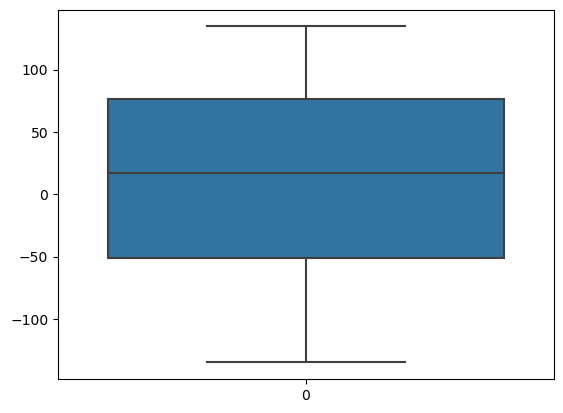

In [831]:
sns.boxplot(df.input);

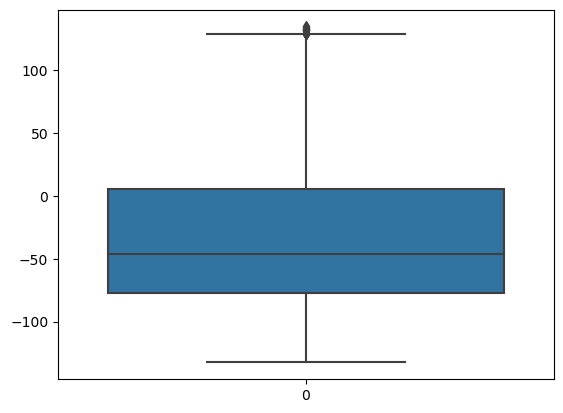

In [832]:
sns.boxplot(df.output);

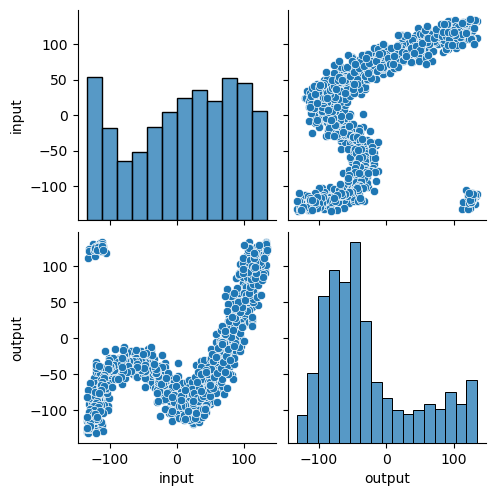

In [833]:
sns.pairplot(df)

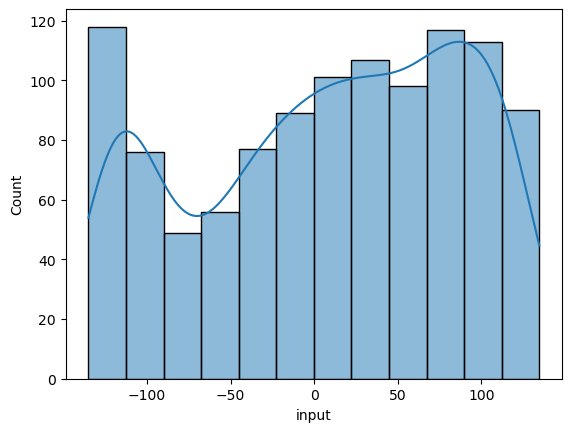

In [834]:
sns.histplot(df.input,kde=True);

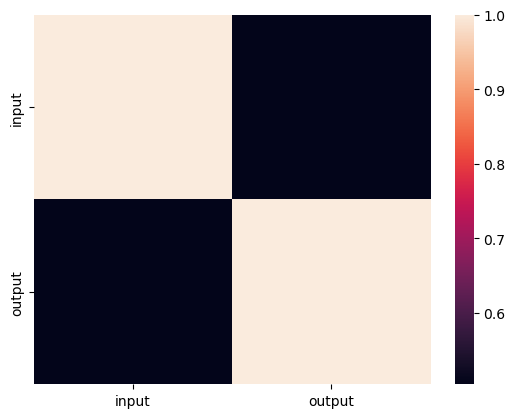

In [835]:
sns.heatmap(df.corr());

In [836]:
df.columns

Index(['input', 'output'], dtype='object')

## a. Identify the Target Variable and Splitting the Data into Train and Test

In [837]:
# Identify the inputs(X) and output (y)

y = df['output']
X = df[['input']]

In [838]:
# Split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state = 143)

In [839]:
X_train.head()

,input
396,73.633331
801,-122.889442
152,-58.914585
542,95.089855
887,30.907386


In [840]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(818, 1) (818,)
(273, 1) (273,)


## b. Seperate the Categorial  and Numerical Columns:

In [841]:
X_train.head()

,input
396,73.633331
801,-122.889442
152,-58.914585
542,95.089855
887,30.907386


In [842]:
X_train.dtypes

input    float64
dtype: object

In [843]:
X_train_num = X_train.select_dtypes(include=['float64','int64'])

X_train_num.head()

,input
396,73.633331
801,-122.889442
152,-58.914585
542,95.089855
887,30.907386


## c. Scaling the Numerical Features

In [844]:
X_train_num.head()

,input
396,73.633331
801,-122.889442
152,-58.914585
542,95.089855
887,30.907386


In [845]:
# scaling the numeroical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                                   columns = X_train_num.columns,
                                   index = X_train_num.index)

X_train_num_rescaled.head()

,input
396,0.863542
801,-1.646047
152,-0.829090
542,1.137541
887,0.317933


In [846]:
X_train_num.describe()

,input
count,818.000000
mean,6.010417
std,78.356661
min,-134.962839
25%,-52.841608
50%,15.685557
75%,74.212855
max,134.605775


In [847]:
print('Number of Numerical Feature:', scaler.n_features_in_)
print('Mean of each column:', scaler.mean_)
print('std of each column:', np.sqrt(scaler.var_))

Number of Numerical Feature: 1
Mean of each column: [6.01041693]
std of each column: [78.30875098]


## d. Concatinating the Encoded Categorical Features and Rescaled Numerical Features

In [848]:
X_train_transformed = pd.concat([X_train_num_rescaled])

X_train_transformed.head()

,input
396,0.863542
801,-1.646047
152,-0.829090
542,1.137541
887,0.317933


## g. Preparing Test Data

In [849]:
X_test.head()

,input
21,-119.116602
222,8.633331
439,83.274124
39,-116.332839
451,123.627724


In [850]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 21 to 805
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   273 non-null    float64
dtypes: float64(1)
memory usage: 4.3 KB


In [851]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,input
21,-119.116602
222,8.633331
439,83.274124
39,-116.332839
451,123.627724


In [852]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,input
21,-1.597868
222,0.033495
439,0.986655
39,-1.562319
451,1.501969


In [853]:
X_test_transformed = pd.concat([X_test_num_rescaled])

X_test_transformed.head()

,input
21,-1.597868
222,0.033495
439,0.986655
39,-1.562319
451,1.501969


## Linear Regression

In [854]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [855]:
# Prediction

y_test_pred = regressor.predict(X_test_transformed)

In [856]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
21,-78.139275,-79.801742
222,-78.000000,-27.997624
439,59.427523,2.270106
39,-57.150899,-78.672892
451,60.832329,18.633971


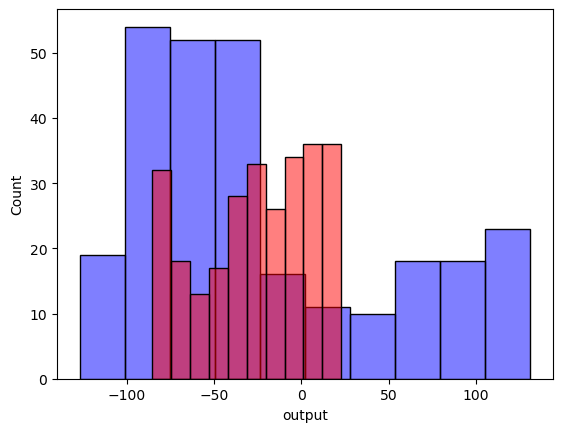

In [857]:
sns.histplot(y_test, color='blue', alpha=0.5);
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [858]:
# Evaluation

from sklearn import metrics

MeanAbsoluteError_LR = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_LR = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_LR = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
                                                
print('Mean Absolute Error: ', MeanAbsoluteError_LR)

print('Mean Squared Error: ', MeanSquaredError_LR)

print('Root Mean Squared Error: ', RootMeanSquaredError_LR)

Mean Absolute Error:  46.62027305332464
Mean Squared Error:  3434.7262828123467
Root Mean Squared Error:  58.60653788454277


## KNN Regression

In [859]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [860]:
# Prediction

y_test_pred = regressor.predict(X_test_transformed)

In [861]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
21,-78.139275,-85.883971
222,-78.000000,-89.364527
439,59.427523,16.487077
39,-57.150899,-42.342855
451,60.832329,118.263551


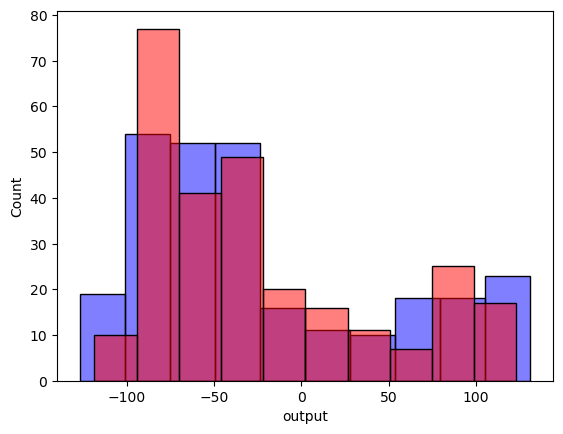

In [862]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [863]:
from sklearn import metrics

MeanAbsoluteError_KNN = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_KNN = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_KNN = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
                                                
print('Mean Absolute Error: ', MeanAbsoluteError_KNN)

print('Mean Squared Error: ', MeanSquaredError_KNN)

print('Root Mean Squared Error: ', RootMeanSquaredError_KNN)

Mean Absolute Error:  22.421405441860806
Mean Squared Error:  1295.277767585296
Root Mean Squared Error:  35.98996759633573


## support Vector Regression

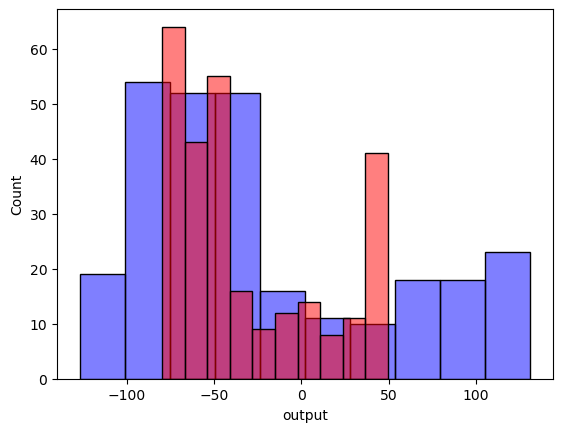

In [864]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train_transformed, y_train)
y_test_pred = regressor.predict(X_test_transformed)
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);




In [865]:
MeanAbsoluteError_SVR = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_SVR = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_SVR = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  26.960490349254016
Mean Squared Error:  1625.8274436728063
Root Mean Squared Error:  40.321550610967414


## Decision Tree Regression

In [866]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)


DecisionTreeRegressor()

In [867]:
y_test_pred = regressor.predict(X_test_transformed)

In [868]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
21,-78.139275,-83.750000
222,-78.000000,-95.000000
439,59.427523,22.407579
39,-57.150899,126.190248
451,60.832329,115.438049


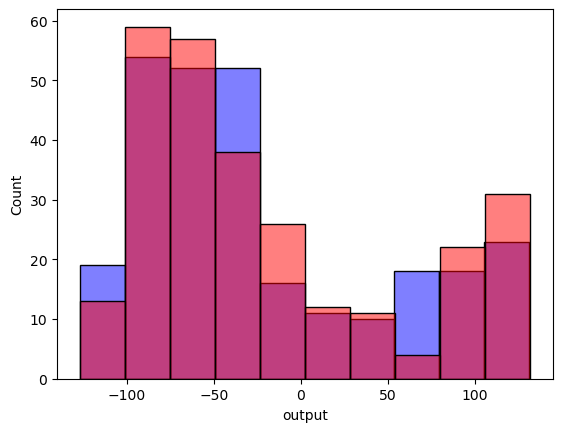

In [869]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [870]:
from sklearn import metrics

MeanAbsoluteError_DTR = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_DTR = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_DTR = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
                                                
print('Mean Absolute Error: ', MeanAbsoluteError_DTR)

print('Mean Squared Error: ', MeanSquaredError_DTR)

print('Root Mean Squared Error: ', RootMeanSquaredError_DTR)

Mean Absolute Error:  29.945461723301587
Mean Squared Error:  2770.3795697692153
Root Mean Squared Error:  52.63439531113866


## Ensemble

## Random Forest Regression

In [871]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [872]:
# Prediction

y_test_pred = regressor.predict(X_test_transformed)

In [873]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
21,-78.139275,-81.151887
222,-78.000000,-91.604330
439,59.427523,18.318060
39,-57.150899,48.748786
451,60.832329,117.563163


<AxesSubplot:xlabel='output', ylabel='Count'>

<AxesSubplot:xlabel='output', ylabel='Count'>

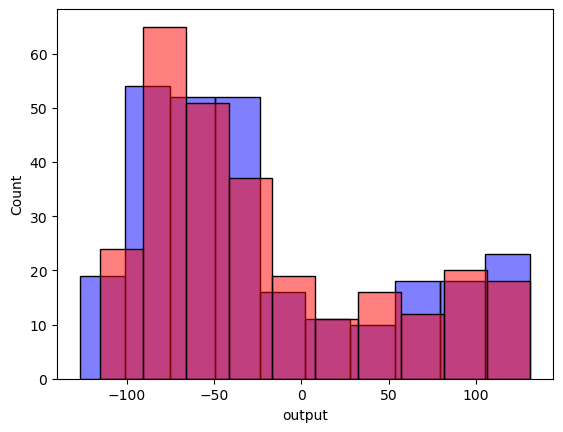

In [874]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [875]:
from sklearn import metrics

MeanAbsoluteError_RFR = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_RFR = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_RFR = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
                                                
print('Mean Absolute Error: ', MeanAbsoluteError_RFR)

print('Mean Squared Error: ', MeanSquaredError_RFR)

print('Root Mean Squared Error: ', RootMeanSquaredError_RFR)

Mean Absolute Error:  25.49737021155068
Mean Squared Error:  1769.002365153583
Root Mean Squared Error:  42.059509806387226


## Boosting

## Gradient Boosted Decision Tree

In [876]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X_train_transformed, y_train)

GradientBoostingRegressor()

In [877]:
# Prediction

y_test_pred = regressor.predict(X_test_transformed)

In [878]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
21,-78.139275,-58.817321
222,-78.000000,-88.493149
439,59.427523,6.538910
39,-57.150899,5.243865
451,60.832329,105.760201


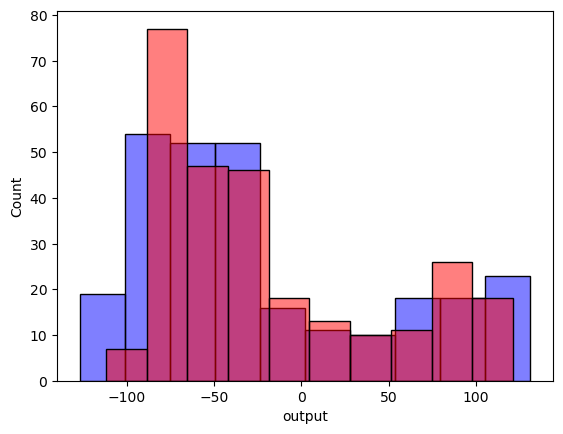

In [879]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [880]:
from sklearn import metrics

MeanAbsoluteError_GBDT = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_GBDT = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_GBDT = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
                                                
print('Mean Absolute Error: ', MeanAbsoluteError_GBDT)

print('Mean Squared Error: ', MeanSquaredError_GBDT)

print('Root Mean Squared Error: ', RootMeanSquaredError_GBDT)

Mean Absolute Error:  21.756139168734947
Mean Squared Error:  1331.6634954926803
Root Mean Squared Error:  36.49196480723778


In [881]:
df_data = [['Linear Regression',MeanAbsoluteError_LR, MeanSquaredError_LR, RootMeanSquaredError_LR],
                   ['K-Nearest Neighbor Regression', MeanAbsoluteError_KNN, MeanSquaredError_KNN, RootMeanSquaredError_KNN ],
                   ['Decision Tree Regression', MeanAbsoluteError_DTR,MeanSquaredError_DTR, RootMeanSquaredError_DTR ],
                   ['Random Forest Regression ', MeanAbsoluteError_RFR,MeanSquaredError_RFR, RootMeanSquaredError_RFR ],
           ['support Vector Regression',MeanAbsoluteError_SVR,MeanSquaredError_SVR,RootMeanSquaredError_SVR],
                   ['Gradient Boosting Decision Tree', MeanAbsoluteError_GBDT,MeanSquaredError_GBDT, RootMeanSquaredError_GBDT ]]

data = pd.DataFrame(df_data, columns = ['Algorithm','Mean Absolute Error','Mean Square Error','Root Mean Square Error'])

In [882]:
data

,Algorithm,Mean Absolute Error,Mean Square Error,Root Mean Square Error
0,Linear Regression,46.620273,3434.726283,58.606538
1,K-Nearest Neighbor Regression,22.421405,1295.277768,35.989968
2,Decision Tree Regression,29.945462,2770.379570,52.634395
3,Random Forest Regression,25.497370,1769.002365,42.059510
4,support Vector Regression,26.960490,1625.827444,40.321551
5,Gradient Boosting Decision Tree,21.756139,1331.663495,36.491965


## Observation


 * Linear Regression---Mean Absolute Error:  46.620273
 * KNN Regression   ---Mean Absolute Error:  22.421405
 * Decision Tree Regression --- Mean Absolute Error:  29.945462
 * Random Forest Regression --- Mean Absolute Error:  25.683183
 * Support Vector Regression --- Mean Absolute Error: 26.960490 	 
 * Gradient Boosting Regressor --- Mean Absolute Error:  21.756139
 

**1. By observing the above table we can say that Gradient Boosting Decision Tree Mean absolute error is less i.e. 25.067372 compaired to other algorithms.**

**2. By compairing all algorithms we can easily says that Gradient Boosting Decision tree is the best algorithm for the Output Prediction.**

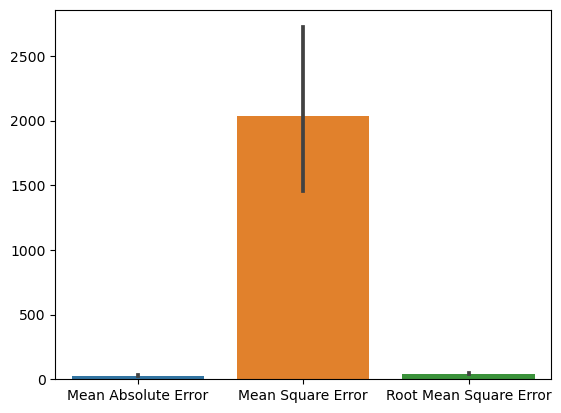

In [884]:
sns.barplot(data);

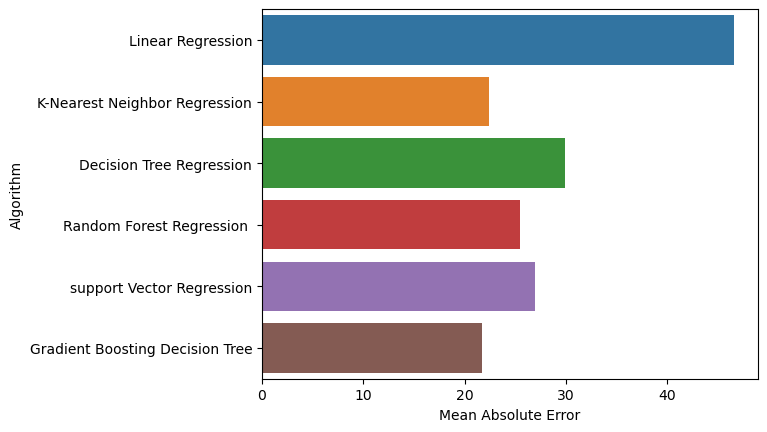

In [885]:
sns.barplot(y=data.Algorithm,x=data['Mean Absolute Error'],ci=False,orient='h');

## Conclusion

**Gradient Boosting Decision tree is the best algorithm for the Output Prediction.**